0. Toy dataset : Two Spirals

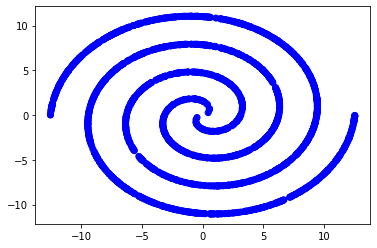

In [36]:
%matplotlib inline

import numpy as np
import math
import toydataset as dataset
import scatterutils
from scipy.spatial.distance import cdist
from scipy.linalg import fractional_matrix_power
from sklearn.utils import shuffle as util_shuffle

n_points = 1000
n_labeled = 25  # in (0,n_points)
n_iteration = 400
alpha = 0.99    # in (0,1)
sigma = 0.2

X, ideal_Y = dataset.create_spirals(n_points, 2)

# show ideal classification
# scatterutils.show_scatter_spirals(X, ideal_Y)

Y = np.concatenate(((ideal_Y[:n_labeled,None] == np.arange(2)).astype(float), np.zeros((n_points-n_labeled,2))))
Y = np.vstack([Y, np.zeros((n_points,2))])
# Y = util_shuffle(Y)

# show n_labeled
init_Y = [1 if x == 0 else 0 for x in Y[0:,0]]
scatterutils.show_scatter_spirals(X, init_Y)

1. Form th affinity matrix W

In [37]:
def rbf_kernel(x, y):
    distance = cdist(x, y, 'euclidean')
    return np.exp(-distance / (2 * math.pow(sigma, 2)))

W = rbf_kernel(X, X)
np.fill_diagonal(W, 0)

2. Construct the matrix S = D^(-1/2)*W*D^(-1/2)
   in which D is a diagonal matrix with its (i, i)-element equal to the sum of the i-th row of W.

In [38]:
def construct_matrix():
    row_sum = np.sum(W, 1)
    d = fractional_matrix_power(np.diag(row_sum), -0.5)
    return np.dot(np.dot(d, W), d)

S = construct_matrix()

3. Iterate F(t+1) = a*S*F(t)+(1-a)*Y : one-iteration
4. Let F denote the limit of the sequence {F(t)}.

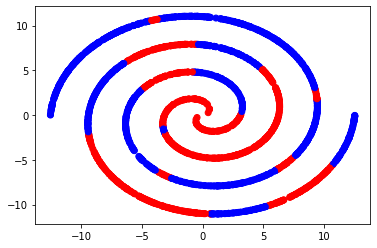

In [39]:
func_F = lambda f : alpha * np.dot(S, f) + (1 - alpha) * Y

def show_result():
    result = np.zeros_like(F)
    result[np.arange(len(F)), np.argmax(F, 1)] = 1
    result_y = [1 if x == 0 else 0 for x in result[0:,0]]
    scatterutils.show_scatter_spirals(X, result_y)

# one-iteration
F = func_F(Y)
show_result()

3. Iterate F(t+1) = a*S*F(t)+(1-a)*Y : n-iteration
4. Let F denote the limit of the sequence {F(t)}.

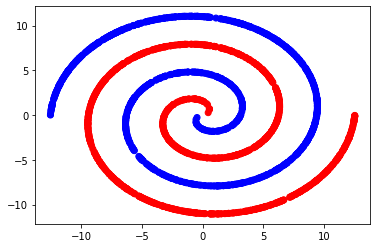

In [40]:
# n-iteration
for t in range(n_iteration):
    F = func_F(F)

show_result()